El resultado del conjunto de datos 1 es:  (11.00999999999981, 0.13676149426431056, 0.0231803631145539)
El resultado del conjunto de datos 2 es:  (11.00999999999981, 0.04754631883479072, 0.09712805890243423)


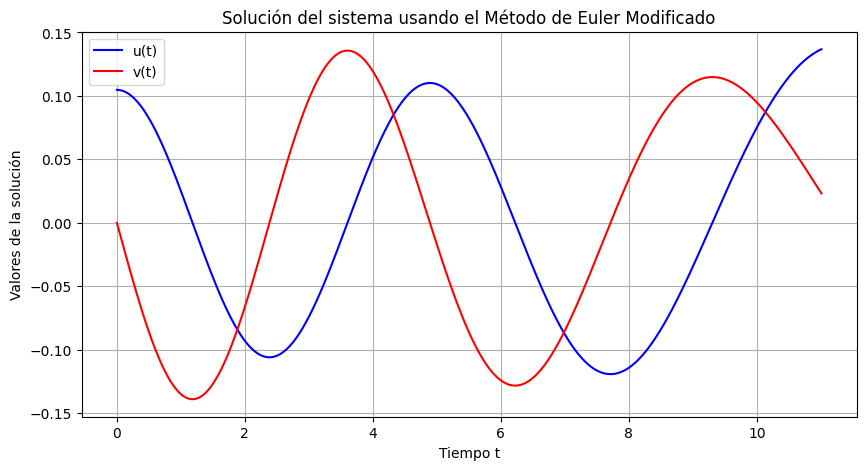

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
#Vamos a seguir los pasos descritos en nuestro documento.tex
#Condiciones iniciales
u0 = np.pi/30
v0 = 0.0
t0 = 0.0
h = 0.01
t_parada = 11
w0 = 0.1
#Proporcionemos dos conjuntos de datos:
#CONJUNTO1
epsilon1 = 0.2
lam1 = 1
omega1 = 1.96
#CONJUNTO 2
epsilon2 = 0.2
lam2 = 0.3
omega2 = 1.5
#Empezaremos por definir nuestro sistema de EDOs
def f(t,u,v):
    # Aquí u' = v
    return v
def g(t,u,v,epsilon,lam,omega):
    # Aqui tenemos u'' = v'
    return -(1+epsilon*lam*omega**2*math.cos(omega*w0*t))*(u-(epsilon**2*u**3)/6.0)
#Nuestro siguiente paso sera construir el metodo de Euler modificado para resolver nuestro sistema de EDOs.
def metodoEmodificado(epsilon,lam,omega,u0,v0,t0,t_parada,h):
    t = t0
    u = u0
    v = v0
    resultados = [] #Creamos este vector para seguir una trayectoria de los resultados obtenidos
    resultados.append((t,u,v)) #Vamos almanecando la tripleta a medida que avanza el tiempo.
    while t < t_parada:
        #Realizamos los pasos predictores
        u_pred = u + h*f(t,u,v)
        v_pred = v + h*g(t,u,v,epsilon,lam,omega)
        t_i = t + h
        #-----------------------------------------
        u_i = u + (h/2.0)*(f(t,u,v)+f(t_i,u_pred,v_pred)) #Aqui simplemente replicamos el metodo
        v_i = v + (h/2.0)*(g(t,u,v,epsilon,lam,omega)+g(t_i,u_pred,v_pred,epsilon,lam,omega))
        t = t_i
        u = u_i
        v = v_i
        resultados.append((t,u,v))
    return resultados
#Ahora vamos a hacer uso de las funciones previas:
Resultados_CONJUNTO1 = metodoEmodificado(epsilon1,lam1,omega1,u0,v0,t0,t_parada,h)
Resultados_CONJUNTO2 = metodoEmodificado(epsilon2,lam2,omega2,u0,v0,t0,t_parada,h)
#Imprimimos y comparamos los resultados:
print("El resultado del conjunto de datos 1 es: ", Resultados_CONJUNTO1[-1])
print("El resultado del conjunto de datos 2 es: ", Resultados_CONJUNTO2[-1])
#Si se desea hacer el seguimiento quitar el #
#matriz1 = [list(it)for it in Resultados_CONJUNTO1]
#print(matriz1)
#matriz2 = [list(it) for it in Resultados_CONJUNTO2]
#print(matriz2)
# Extraemos las listas de tiempo, u y v para graficar
t_vals = [item[0] for item in Resultados_CONJUNTO1]
u_vals = [item[1] for item in Resultados_CONJUNTO1]
v_vals = [item[2] for item in Resultados_CONJUNTO1]

# Graficar las soluciones u(t) y v(t)
plt.figure(figsize=(10, 5))
plt.plot(t_vals, u_vals, label='u(t)', color='blue')
plt.plot(t_vals, v_vals, label='v(t)', color='red')
plt.xlabel('Tiempo t')
plt.ylabel('Valores de la solución')
plt.title('Solución del sistema usando el Método de Euler Modificado')
plt.legend()
plt.grid(True)
plt.show()
